In [ ]:
#Agenda
1. Pytorch | Keras - Tensorflow
  a. Keras - Little customization missing
  b. Flexibility - more customizable
2. Tensor manipulation in Pytorch
3. Linear Regression with torch - NN - LR

In [1]:
import torch
print(torch.__version__)

2.2.1+cu121


In [ ]:
[] - List
{} - Set / Dict
() - Tuple
np - Arrays
torch - tensors

In [3]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim

0

In [5]:
#Scalar Specific function
scalar.item()

7

In [6]:
vector = torch.tensor([1,1])
vector

tensor([1, 1])

In [7]:
vector.ndim

1

In [8]:
MATRIX = torch.tensor([[7,8],[9,10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
torch.zeros(size = (3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
torch.ones(size = (3,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [13]:
float_32_tensor = torch.tensor([3,4,6], dtype = None,device = None, requires_grad = False) #Device - CPU, GPU, TPU

In [14]:
float_32_tensor.dtype

torch.int64

In [15]:
float_32_tensor

tensor([3, 4, 6])

In [16]:
float_32_tensor = torch.tensor([3,4,6], dtype = torch.float32,device = None, requires_grad = False)

In [17]:
float_32_tensor.dtype

torch.float32

In [18]:
float_32_tensor

tensor([3., 4., 6.])

In [19]:
exampleTensor = torch.rand(3,4)

In [21]:
exampleTensor.shape

torch.Size([3, 4])

In [23]:
exampleTensor.dtype

torch.float32

In [24]:
exampleTensor.device

device(type='cpu')

In [25]:
float_32_tensor - 10

tensor([-7., -6., -4.])

In [26]:
tensor1 = torch.rand(3,3)
tensor2 = torch.rand(3,3)

In [27]:
tensor1 @ tensor2

tensor([[0.4623, 0.9814, 1.5291],
        [0.2614, 0.2135, 0.5770],
        [0.4016, 0.6192, 1.1049]])

In [28]:
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [29]:
x.min()

tensor(0)

In [30]:
x.max()

tensor(90)

In [31]:
x.sum()

tensor(450)

In [32]:
import torch
x = torch.arange(1.,8.)

In [34]:
x.shape

torch.Size([7])

In [35]:
x = x.reshape(1,7)

In [36]:
x.shape

torch.Size([1, 7])

In [38]:
x = x.squeeze()
x.shape

torch.Size([7])

In [40]:
x = x.unsqueeze(dim=0)
x.shape

torch.Size([1, 7])

In [2]:
import torch
import numpy as np
array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
array , tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

## Changing runtime type to T4

In [4]:
!nvidia-smi

Sat Apr  6 03:59:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import torch
torch.cuda.is_available()

True

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
torch.cuda.device_count()

1

In [9]:
#ONLY FOR MAC M1 - any apple silicons
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'cpu'

In [11]:
tensor = torch.tensor([1,2,3])
tensor.device

device(type='cpu')

In [15]:
tensor_on_gpu = tensor.to(device)

In [16]:
tensor_on_gpu.device

device(type='cuda', index=0)

In [17]:
tensor_on_gpu[0]

tensor(1, device='cuda:0')

In [18]:
tensor_on_gpu[0]*20

tensor(20, device='cuda:0')

In [19]:
tensor_on_gpu.cpu()

tensor([1, 2, 3])

In [ ]:
LR = {
    1: "data prepare",
    2: "Build Model",
    3: 'make predictions',
    4: 'Load and save the model',
    5: 'Future Preds'
    }

In [24]:
#1. Data
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim= 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [25]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [36]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train, train_labels = y_train,test_data = X_test, test_labels = y_test, predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c ='b',label = "Train data")
  plt.scatter(test_data, test_labels, c ='c',label = "Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c ='r',label = "predictions")
  plt.legend(prop ={'size':10})

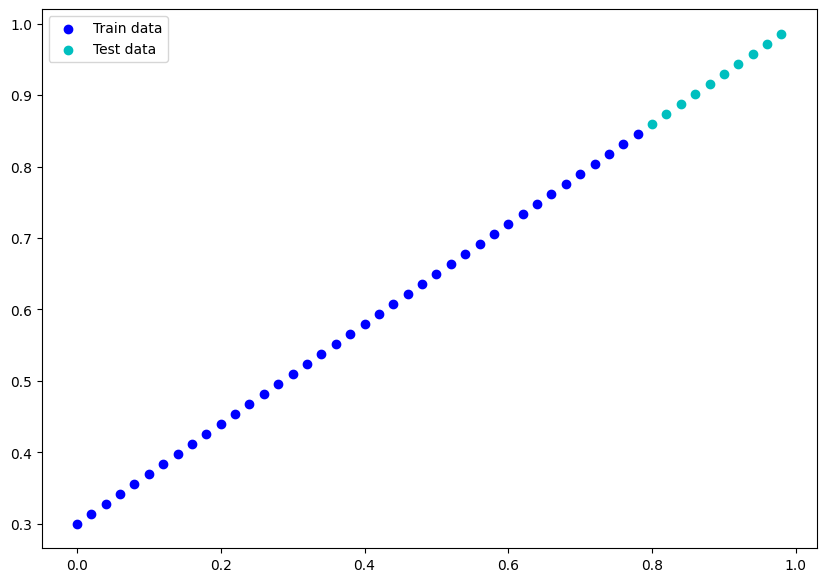

In [27]:
plot_predictions()

In [50]:
import torch
from torch import nn
class LinearRegressionModel(nn.Module): #Lego blocks #Computation Graph
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float),requires_grad = True) #Slope
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float),requires_grad = True) #Intercept

  #Forward Propagation - One round of forward computation - Mx + C | Back prop or Back propagation is computing descent
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [51]:
torch.manual_seed(42)

In [52]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [53]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [54]:
#Inference torch.no_grad()
with torch.inference_mode():
  ypredict = model_0(X_test)

In [55]:
ypredict

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

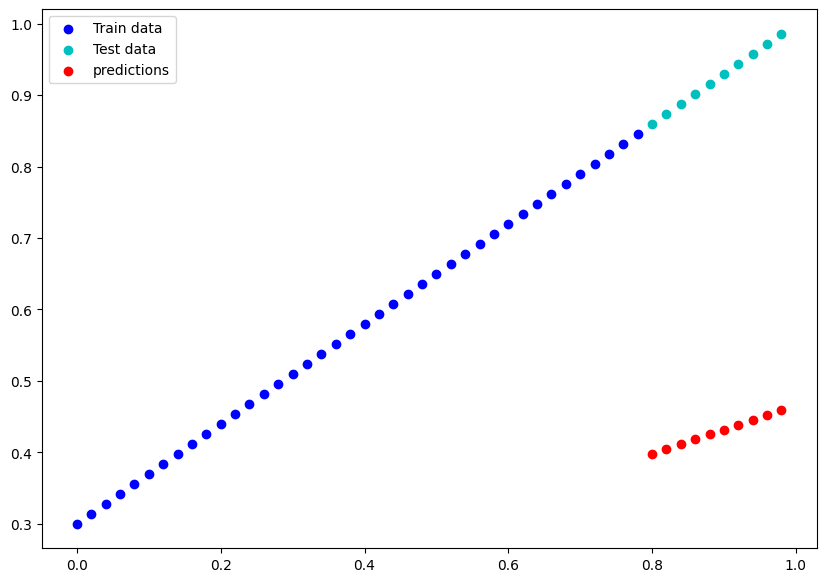

In [56]:
plot_predictions(predictions = ypredict)

In [57]:
#Training
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [59]:
torch.manual_seed(44)

epochs = 100
train_loss_values = []
test_loss_values= []
epoch_count =[]

for epoch in range(epochs):
  #1. putting model in training mode (This is the default mode) #Forward
  model_0.train()
  y_pred = model_0(X_train)

  #2. Calculate my loss
  loss = loss_fn(y_pred, y_train)

  #3. zero grad of optimizer
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Progress the optimizer
  optimizer.step()

  ##Test
  model_0.eval()

  with torch.inference_mode():
    #forward prop on data
    test_pred = model_0(X_test)

    #2. loss on test
    test_loss = loss_fn(test_pred,y_test.type(torch.float))


    if epoch %10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss:{test_loss}")

Epoch: 0 | MAE train loss: 0.3013603389263153 | MAE test loss:0.4675942063331604
Epoch: 10 | MAE train loss: 0.18615034222602844 | MAE test loss:0.3328842222690582
Epoch: 20 | MAE train loss: 0.08227583020925522 | MAE test loss:0.2069590985774994
Epoch: 30 | MAE train loss: 0.05181945487856865 | MAE test loss:0.14023718237876892
Epoch: 40 | MAE train loss: 0.04503796249628067 | MAE test loss:0.11182951927185059
Epoch: 50 | MAE train loss: 0.04132963344454765 | MAE test loss:0.09809747338294983
Epoch: 60 | MAE train loss: 0.03785243630409241 | MAE test loss:0.08776430785655975
Epoch: 70 | MAE train loss: 0.03441363573074341 | MAE test loss:0.0794917643070221
Epoch: 80 | MAE train loss: 0.030979642644524574 | MAE test loss:0.07190609723329544
Epoch: 90 | MAE train loss: 0.02754882536828518 | MAE test loss:0.06363357603549957


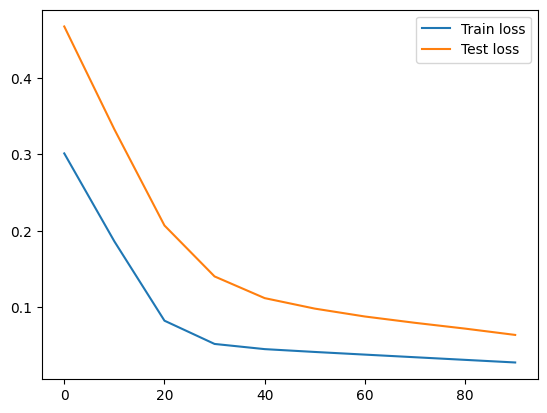

In [61]:
plt.plot(epoch_count,train_loss_values,label = "Train loss")
plt.plot(epoch_count,test_loss_values, label = "Test loss")
plt.legend()
plt.show()

In [62]:
 model_0.state_dict()

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

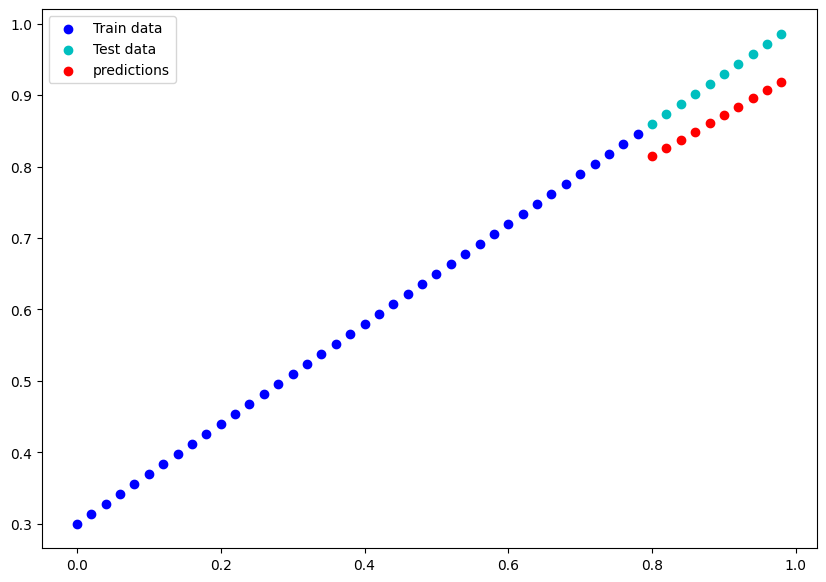

In [63]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions = y_preds)

In [64]:
torch.save(obj = model_0.state_dict(), f = "SimpleLinearReg.pth")

In [65]:
#empty model
loaded_model_0 = LinearRegressionModel()

In [66]:
loaded_model_0.load_state_dict(torch.load(f = "SimpleLinearReg.pth"))

<All keys matched successfully>

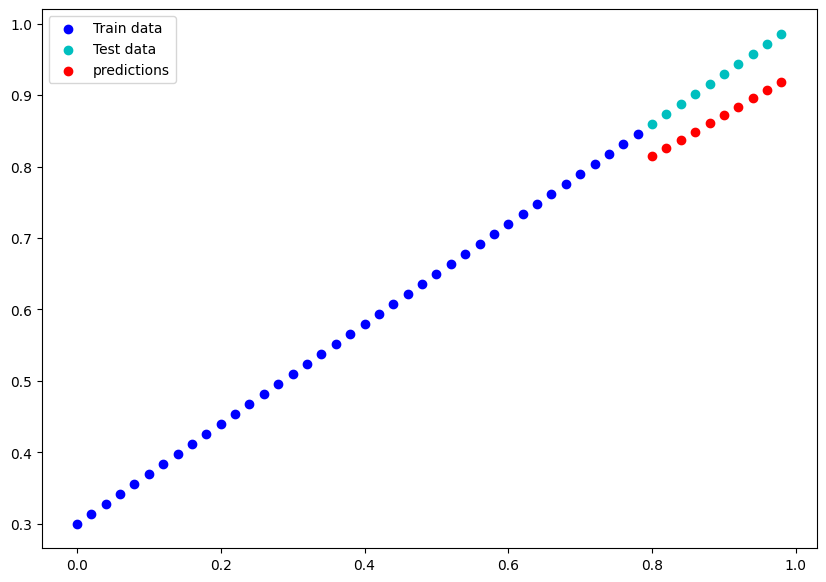

In [67]:
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)

plot_predictions(predictions = y_preds)